In [ ]:
!pip install numpy==1.23.5
!pip install causalpy==0.0.14

In [ ]:
from sklearn.linear_model import LinearRegression
import causalpy as cp

In [ ]:
data = cp.load_data("did")
data.head()

,group,t,unit,post_treatment,y
0,0,0.0,0,False,0.897122
1,0,1.0,0,True,1.961214
2,1,0.0,1,False,1.233525
3,1,1.0,1,True,2.752794
4,0,0.0,2,False,1.149207


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


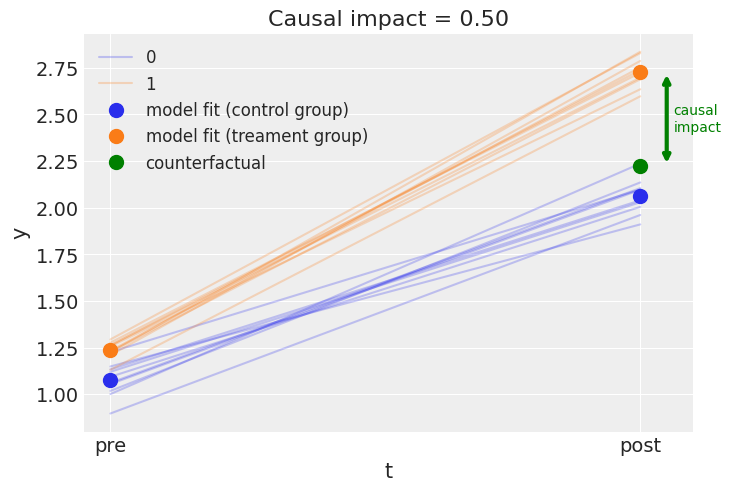

In [ ]:
result = cp.skl_experiments.DifferenceInDifferences(
    data,
    formula="y ~ 1 + group*post_treatment",# モデルの式（yは目的変数、1は定数項を意味する）
    time_variable_name="t",# 時間変数の名前
    group_variable_name="group",# グループ変数（処置群か対照群かを示す変数）の名前
    treated=1,# 処置群を示す値
    untreated=0,# 対照群を示す値
    model=LinearRegression(),
)

fig, ax = result.plot();# 分析結果のプロット